In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
DB_PATH = os.path.join('/Users', 'ck-intosh','Downloads', 'COMP_DL', 'Proj_2', 'train')
LABEL_PATH = os.path.join('/Users', 'ck-intosh', 'Downloads', 'COMP_DL', 'Proj_2', 'labels.csv')

In [3]:
labels_df = pd.read_csv(LABEL_PATH, index_col=0)
labels = sorted(list(set(labels_df.breed)))

labels_map = {labels[i]:i for i in range(len(labels))}
labels_map_rev = {i:labels[i] for i in range(len(labels))}
print(labels_map)

NUM_CLASS = len(labels)

class_to_num = dict(zip(labels, range(NUM_CLASS)))

IMG_SIZE = 128
NUM_CHANNELS = 3

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [4]:
def get_abs_img_path(img, dir):
  return os.path.join(DB_PATH, dir, img)

IMG_PATHS = []

ims = os.listdir(DB_PATH)
ims = [x for x in ims if x[0] != '.']

IMG_PATHS += list(map(get_abs_img_path, ims, [DB_PATH] * len(ims)))

print(f"\n+ {'Total Img':<10}:", len(IMG_PATHS))


+ Total Img : 10222


In [5]:
VAL_IMG_PATHS = []
TRAIN_IMG_PATHS = []

limit = 15

img_count_recorder = [0] * len(labels)

for img_path in IMG_PATHS:
    str_file = os.path.splitext(''+os.path.basename(img_path))[0]
    str_v = labels_df.loc[str_file].values[0]
    index = labels_map[str_v]
    if (img_count_recorder[index] < limit):
        VAL_IMG_PATHS.append(img_path)
    else :
        TRAIN_IMG_PATHS.append(img_path)
    img_count_recorder[index] += 1

print(img_count_recorder)
print("IMG in train : " , len(TRAIN_IMG_PATHS))
print("IMG in Vald  : " , len(VAL_IMG_PATHS))

[80, 116, 86, 107, 74, 78, 102, 110, 82, 105, 89, 114, 77, 102, 85, 85, 72, 91, 75, 87, 86, 75, 67, 66, 73, 75, 106, 76, 83, 71, 93, 80, 74, 87, 72, 89, 76, 80, 74, 86, 83, 75, 115, 66, 72, 70, 69, 75, 69, 67, 81, 75, 111, 82, 82, 91, 88, 82, 78, 101, 92, 105, 81, 86, 82, 67, 71, 84, 99, 106, 90, 81, 73, 117, 80, 102, 79, 78, 91, 83, 95, 78, 87, 69, 96, 75, 92, 111, 94, 72, 88, 76, 84, 99, 109, 86, 82, 126, 88, 76, 112, 95, 90, 71, 79, 79, 72, 78, 69, 107, 80, 79, 70, 69, 85, 79, 81, 95, 82, 82]
IMG in train :  8422
IMG in Vald  :  1800


In [6]:
def load_dataset(img_list):
    x_data, y_data = [], []
    for img_path in img_list:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        x_data.append(np.array(img).astype("float32"))
        img_name = img_path.split(os.path.sep)[-1].split('.')[0]
        class_id = class_to_num[labels_df.loc[img_name].breed]
        y_data.append(class_id)
    x_data = np.array(x_data)
    y_data = tf.keras.utils.to_categorical(y_data, num_classes=NUM_CLASS)
    
    x_data_aug, y_data_aug = shuffle(x_data, y_data)
    return x_data_aug, y_data_aug

In [7]:
x_train, y_train = load_dataset(TRAIN_IMG_PATHS)
print("Train : IMG", x_train.shape)
print("Train : LB ", y_train.shape)

x_val, y_val = load_dataset(VAL_IMG_PATHS)
print("Val : IMG", x_val.shape)
print("Val : LB ", y_val.shape)

Train : IMG (8422, 128, 128, 3)
Train : LB  (8422, 120)
Val : IMG (1800, 128, 128, 3)
Val : LB  (1800, 120)


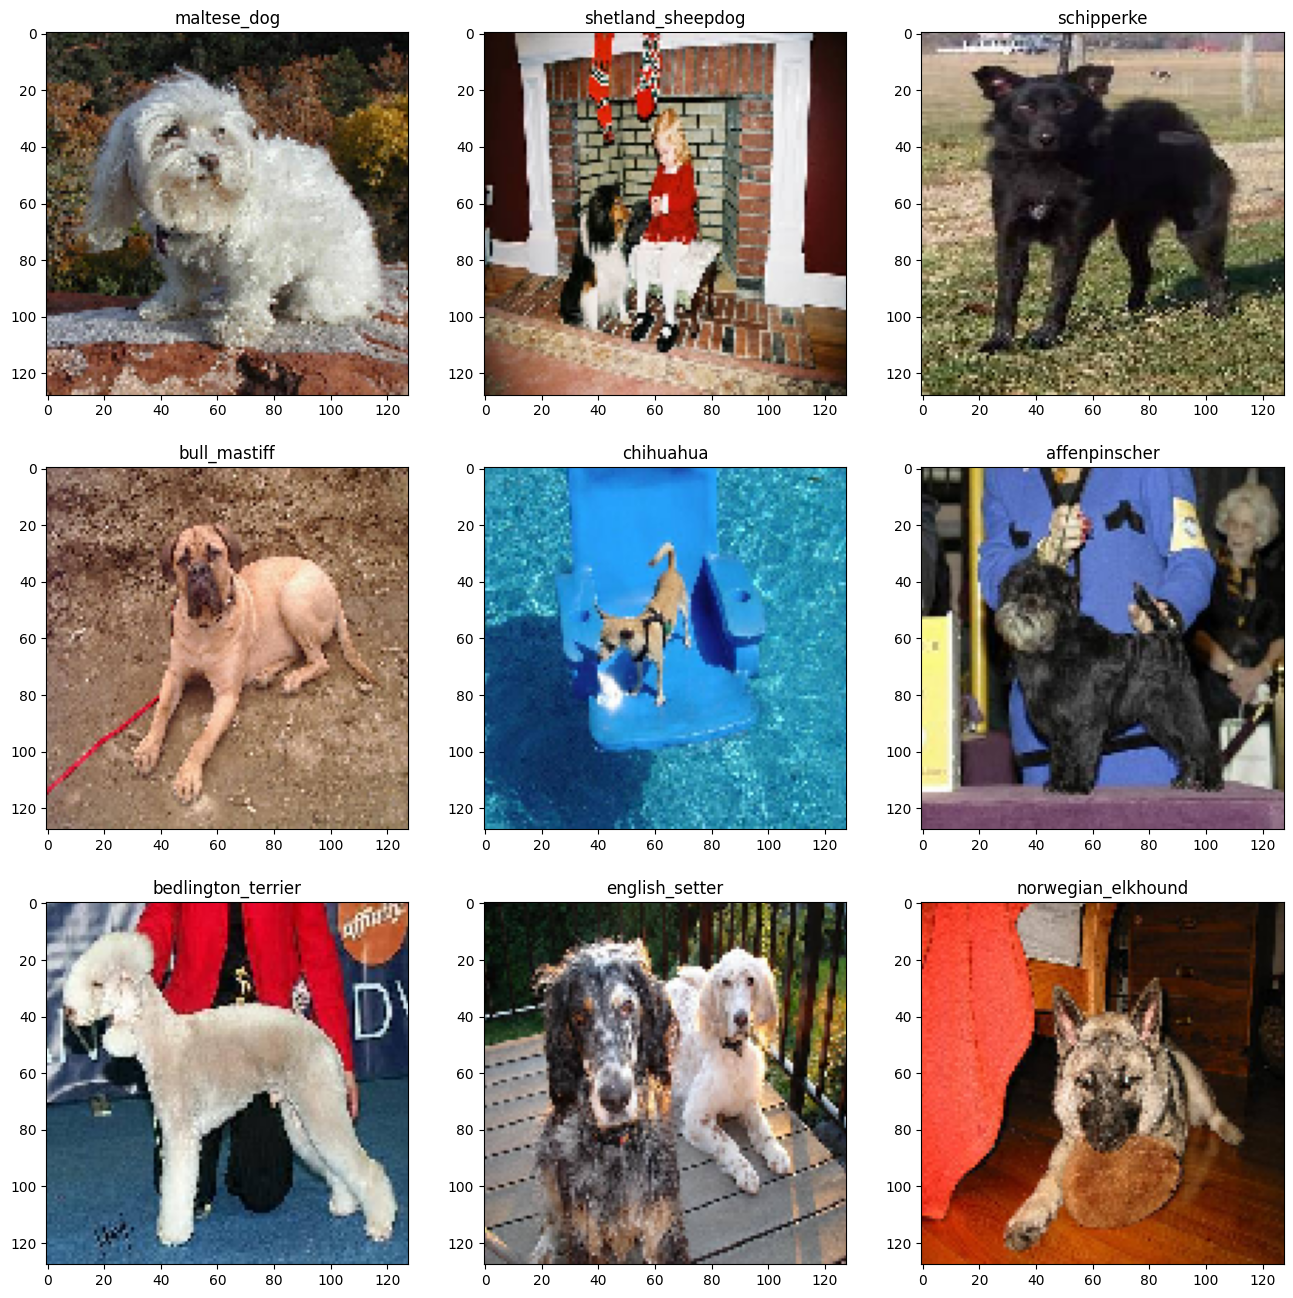

In [8]:
def show_samples(dataset_x, dataset_y):
  fig = plt.figure(figsize=(16,16))
  columns = 3
  rows = 3
  i = 1
  for ik in range(columns*rows):
    img = dataset_x[ik] 
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img/255.0))
    index = np.argmax(dataset_y[ik])
    plt.title(labels_map_rev[index])
    i += 1
  plt.show()
show_samples(x_train, y_train)

In [9]:
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [10]:
MODEL_N = ''
MODEL = ''
MODEL_PATH = ''
HISTORY_PATH = ''
def rename_model(model):
    global MODEL_N,MODEL, MODEL_PATH, HISTORY_PATH
    MODEL_N = model
    MODEL   = os.path.join(os.getcwd(), 'model')
    MODEL_PATH   = os.path.join(os.getcwd(), 'model', MODEL_N)
    HISTORY_PATH = os.path.join(os.getcwd(), 'history')

    if (not os.path.exists(MODEL)) :
        os.mkdir(MODEL)
    if (not os.path.exists(MODEL_PATH)) :
        os.mkdir(MODEL_PATH)
    if (not os.path.exists(HISTORY_PATH)) :
        os.mkdir(HISTORY_PATH)

    file_name = 'model_' + MODEL_N
    f = open(os.path.join(HISTORY_PATH, file_name + '.csv'), "w")
    f.write("epoch, accuracy, validation_accuracy, loss, validation_loss\n")
    f.close()

In [11]:
class real_time_callback(tf.keras.callbacks.Callback):

    def __init__(self):
        super().__init__()
        self.loss_list = []
        self.val_loss = []
        self.acc_list = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}): 
      self.loss_list.append(logs.get('loss'))
      self.val_loss.append(logs.get('val_loss'))
      self.acc_list.append(logs.get('accuracy'))
      self.val_acc.append(logs.get('val_accuracy'))


      file_name = 'model_' + MODEL_N
      f = open(os.path.join(HISTORY_PATH, file_name + '.csv'), "a")
      f.write(str(epoch) + ', ' + str(logs.get('accuracy')) + ", " + str(logs.get('val_accuracy')) + ", " + str(logs.get('loss')) + ", " + str(logs.get('val_loss')) + '\n')
      f.close()
      if (epoch % 10) == 0:
          fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

          ax1.plot(self.loss_list)
          ax1.set_title('model loss')
          ax1.set_ylabel('loss')
          ax1.set_xlabel('epoch')
          ax1.plot(self.val_loss)
          ax1.legend(['train', 'val'], loc='upper left')

          ax2.set_title('model accuracy')
          ax2.set_ylabel('accuracy')
          ax2.set_xlabel('epoch')
          ax2.plot(self.acc_list)
          ax2.plot(self.val_acc)
          ax2.legend(['train', 'val'], loc='upper left')
          plt.show()
          file_name = 'model_' + MODEL_N + '_' + str(epoch)
          model.save(os.path.join(MODEL_PATH, file_name))
      if len(self.val_acc) >= 2 and (max(self.val_acc[:-1]) < logs.get('val_accuracy')):
        file_name = 'model_' + MODEL_N + '_BEST'
        model.save(os.path.join(MODEL_PATH, file_name))
        f = open(os.path.join(HISTORY_PATH, file_name + '.txt'), "w")
        f.write("Epoch :" + str(epoch) + "\nLoss : " + str(logs.get('loss')) + "\nAccuracy :" + str(logs.get('accuracy')) + "\nV Loss :" + str(logs.get('val_loss')) + "\nV Accuracy :" + str(logs.get('val_accuracy')))
        f.close()

In [12]:
# Input data params

# since 
NUM_CHANNELS = 3

# Output params
NUM_CLASSES = 120

IMG_SIZE_FLAT = IMG_SIZE * IMG_SIZE

In [20]:
NUM_FILTER_1 = 256

FILTER_SIZE_1 = 5

FEAT_EX_FILTER_SIZE_A = 1
FEAT_EX_FILTER_SIZE_B = 3
FEAT_EX_FILTER_SIZE_C = 1

# FEATRX MODEL
PADDING = 'same'
img_input = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, NUM_CHANNELS))

# MODEL SATRT
conv_1       = tf.keras.layers.Conv2D(filters=NUM_FILTER_1, kernel_size=(FILTER_SIZE_1, FILTER_SIZE_1), strides=(2, 2),padding=PADDING, activation=tf.nn.relu)(img_input)
maxpool_1    = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_1)
normalized_1 = tf.keras.layers.BatchNormalization()(maxpool_1)

def feat_ex_block(input_layer, num_filter_1, count=1):
  assert (count >= 1)
  """
  Parameters:
    input_layer  = previous layer of the model
    num_filter_1 = number of filters in first convolutional layer
    count        = number of FEAT_EX blocks to consider (default 1) 
  Return:
    maxpooled_layer after all FEAT_EX blocks.
  """
  FEAT_EX_NUM_FILTER_A = num_filter_1 + 32
  FEAT_EX_NUM_FILTER_B = FEAT_EX_NUM_FILTER_A * 2 + 16
  FEAT_EX_NUM_FILTER_C = num_filter_1

  conv_a     = tf.keras.layers.Conv2D(filters=FEAT_EX_NUM_FILTER_A, kernel_size=(FEAT_EX_FILTER_SIZE_A, FEAT_EX_FILTER_SIZE_A), strides=(1,1), padding=PADDING, activation=tf.nn.relu)(input_layer)
  conv_b     = tf.keras.layers.Conv2D(filters=FEAT_EX_NUM_FILTER_B, kernel_size=(FEAT_EX_FILTER_SIZE_B, FEAT_EX_FILTER_SIZE_B), strides=(1,1), padding=PADDING, activation=tf.nn.relu)(conv_a)

  maxpool_a  = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(1,1), padding=PADDING)(input_layer)
  conv_c     = tf.keras.layers.Conv2D(filters=FEAT_EX_NUM_FILTER_C, kernel_size=(FEAT_EX_FILTER_SIZE_C, FEAT_EX_FILTER_SIZE_C), strides=(1,1))(maxpool_a)

  concat_2   = tf.keras.layers.concatenate(inputs=[conv_b , conv_c], axis=3)
  maxpool_b  = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(concat_2)
  if count == 1:
    return maxpool_b
  else :
    return feat_ex_block(maxpool_b, num_filter_1, count-1)

feat_feed = feat_ex_block(normalized_1, NUM_FILTER_1, 4)

# FINAL LAYER
net = tf.keras.layers.Flatten()(feat_feed)
net = tf.keras.layers.Dropout(0.4)(net)
net = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(net)
model = tf.keras.Model(img_input, net)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 64, 64, 256)  19456       ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_24 (MaxPooling2D  (None, 32, 32, 256)  0          ['conv2d_34[0][0]']              
 )                                                                                                
                                                                                            

Epoch 1/400


2023-04-10 09:30:34.701943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


264/264 [==============================] - ETA: 0s - loss: 4.9697 - accuracy: 0.0126

2023-04-10 09:31:35.546449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


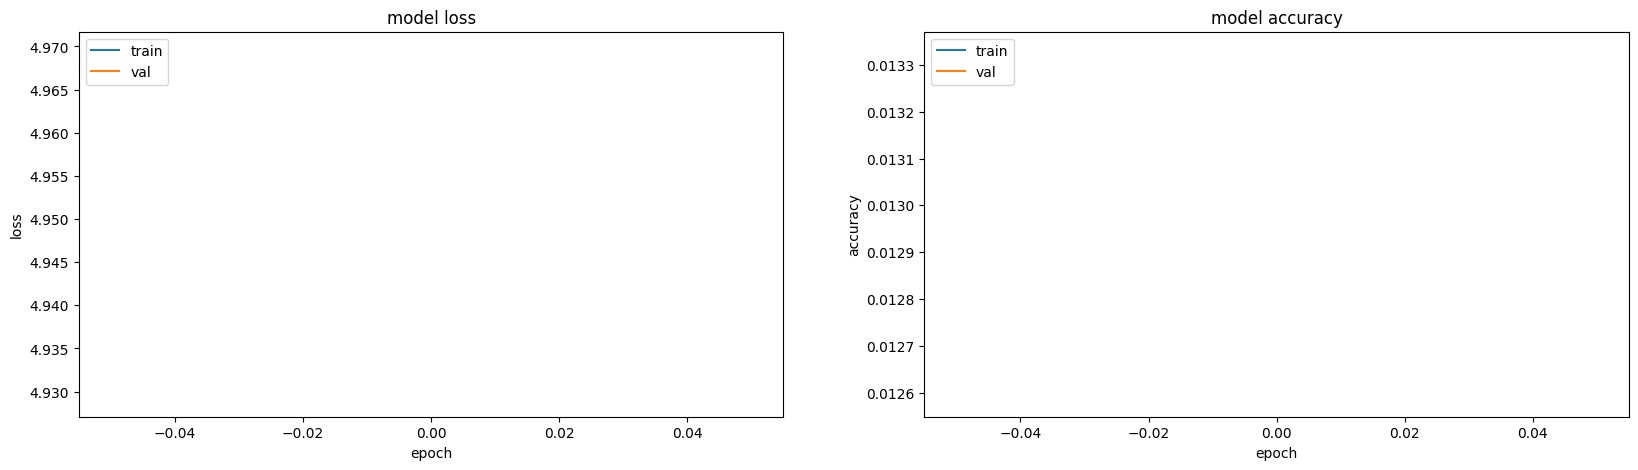

INFO:tensorflow:Assets written to: model__0/assets
264/264 [==============================] - 68s 248ms/step - loss: 4.9697 - accuracy: 0.0126 - val_loss: 4.9291 - val_accuracy: 0.0133
Epoch 2/400
264/264 [==============================] - 63s 239ms/step - loss: 4.6693 - accuracy: 0.0273 - val_loss: 4.7447 - val_accuracy: 0.0217
Epoch 3/400
264/264 [==============================] - 63s 240ms/step - loss: 4.4722 - accuracy: 0.0413 - val_loss: 4.6756 - val_accuracy: 0.0372
Epoch 4/400
264/264 [==============================] - 61s 231ms/step - loss: 4.3008 - accuracy: 0.0617 - val_loss: 5.1626 - val_accuracy: 0.0283
Epoch 5/400
264/264 [==============================] - 63s 239ms/step - loss: 4.1368 - accuracy: 0.0799 - val_loss: 4.8210 - val_accuracy: 0.0439
Epoch 6/400
264/264 [==============================] - 63s 239ms/step - loss: 3.9787 - accuracy: 0.0995 - val_loss: 4.1688 - val_accuracy: 0.0744
Epoch 7/400
264/264 [==============================] - 61s 231ms/step - loss: 3.8236 

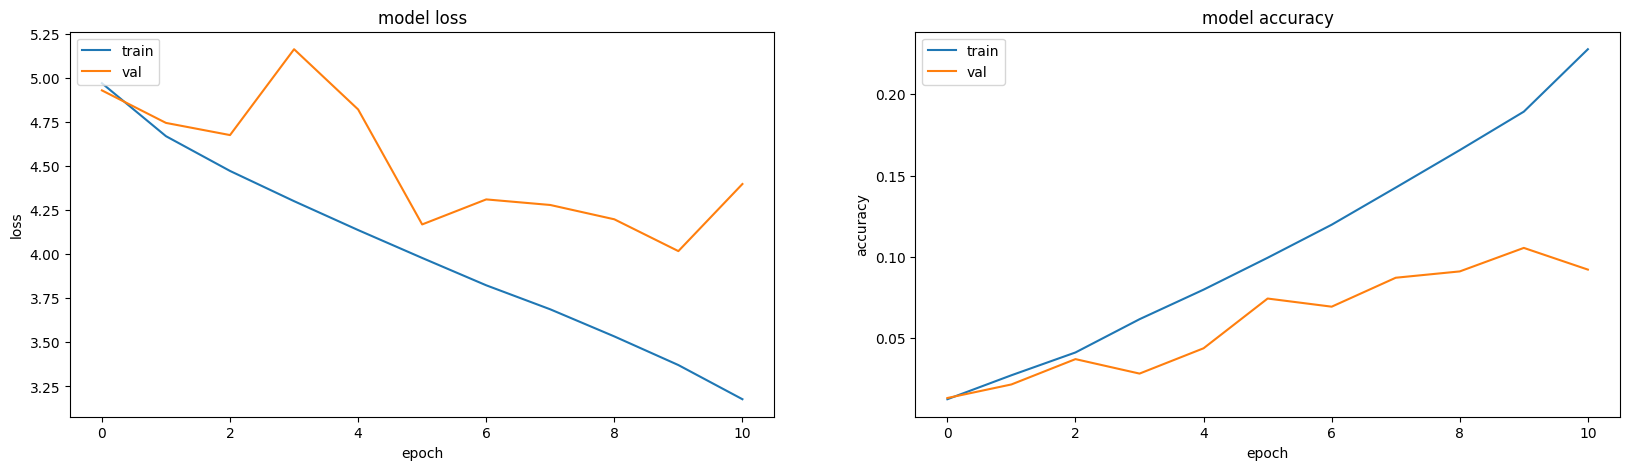

INFO:tensorflow:Assets written to: model__10/assets
264/264 [==============================] - 63s 240ms/step - loss: 3.1774 - accuracy: 0.2276 - val_loss: 4.3981 - val_accuracy: 0.0922
Epoch 12/400
264/264 [==============================] - 63s 239ms/step - loss: 2.9884 - accuracy: 0.2660 - val_loss: 4.0967 - val_accuracy: 0.1206
Epoch 13/400
264/264 [==============================] - 63s 240ms/step - loss: 2.8130 - accuracy: 0.2948 - val_loss: 4.3441 - val_accuracy: 0.1306
Epoch 14/400
264/264 [==============================] - 61s 231ms/step - loss: 2.5924 - accuracy: 0.3428 - val_loss: 4.4548 - val_accuracy: 0.1106
Epoch 15/400
264/264 [==============================] - 61s 232ms/step - loss: 2.3799 - accuracy: 0.3940 - val_loss: 4.6510 - val_accuracy: 0.1189
Epoch 16/400
264/264 [==============================] - 61s 230ms/step - loss: 2.0999 - accuracy: 0.4575 - val_loss: 4.9583 - val_accuracy: 0.1106
Epoch 17/400
264/264 [==============================] - 61s 230ms/step - loss: 

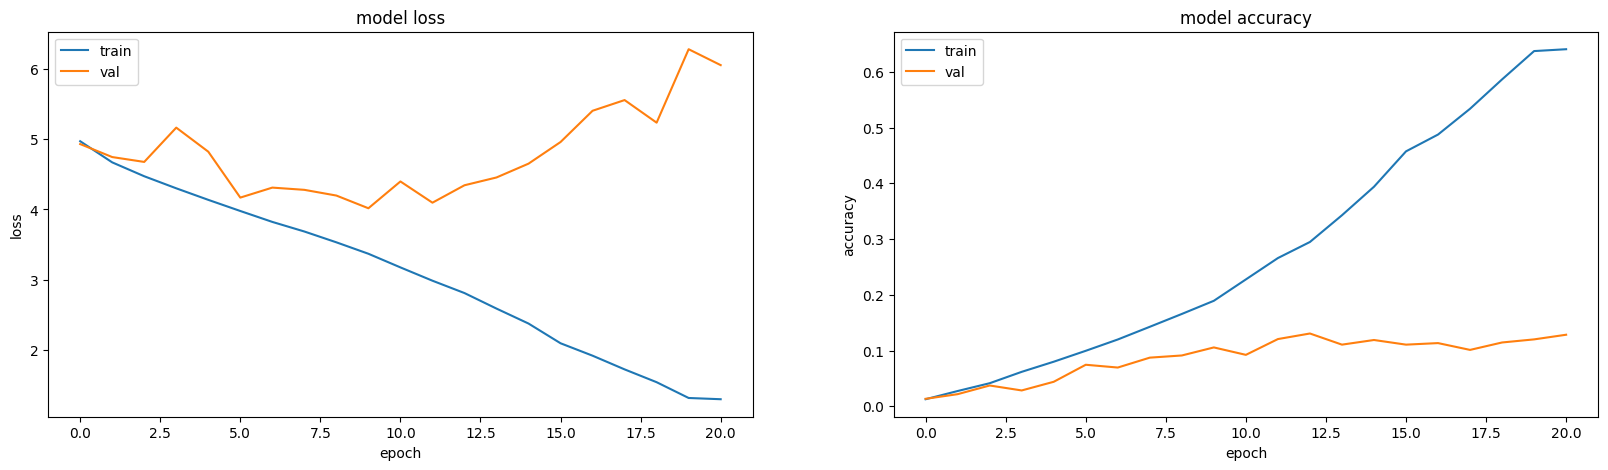

INFO:tensorflow:Assets written to: model__20/assets
264/264 [==============================] - 63s 240ms/step - loss: 1.3051 - accuracy: 0.6408 - val_loss: 6.0504 - val_accuracy: 0.1283
Epoch 22/400
264/264 [==============================] - 61s 231ms/step - loss: 1.0801 - accuracy: 0.7081 - val_loss: 6.8303 - val_accuracy: 0.1167
Epoch 23/400
264/264 [==============================] - 61s 231ms/step - loss: 1.0738 - accuracy: 0.7118 - val_loss: 6.4674 - val_accuracy: 0.1161
Epoch 24/400
264/264 [==============================] - 61s 231ms/step - loss: 0.9522 - accuracy: 0.7350 - val_loss: 6.8739 - val_accuracy: 0.1233
Epoch 25/400
264/264 [==============================] - 61s 230ms/step - loss: 0.8542 - accuracy: 0.7651 - val_loss: 7.4542 - val_accuracy: 0.1272
Epoch 26/400
264/264 [==============================] - 63s 239ms/step - loss: 0.9561 - accuracy: 0.7431 - val_loss: 7.2446 - val_accuracy: 0.1339
Epoch 27/400
264/264 [==============================] - 61s 231ms/step - loss: 

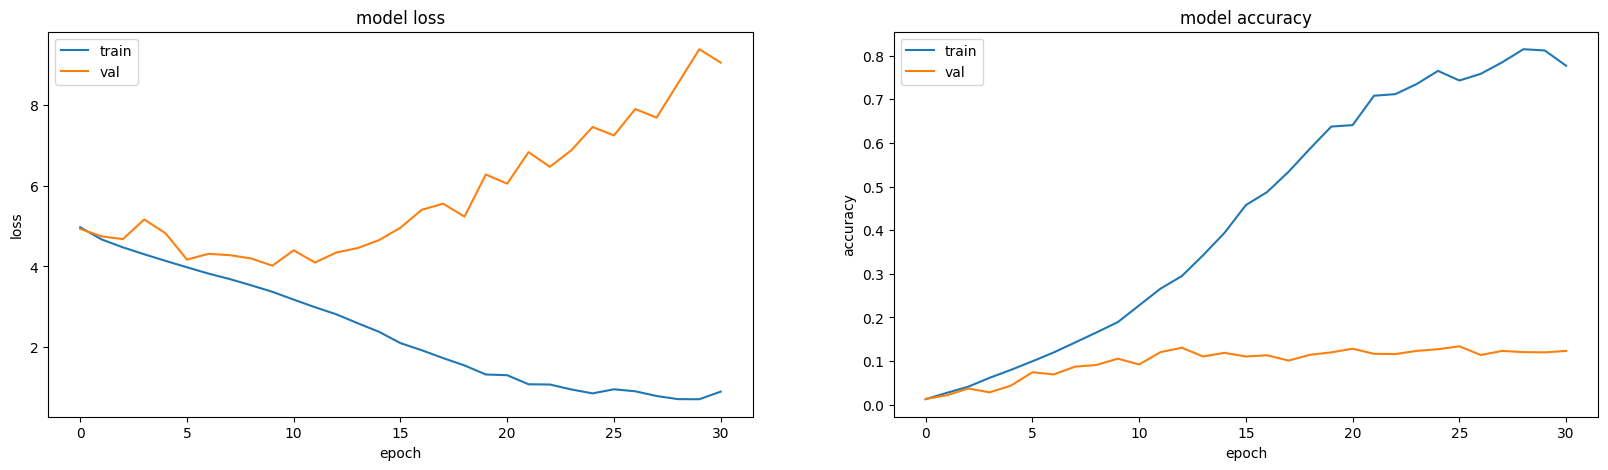

INFO:tensorflow:Assets written to: model__30/assets
264/264 [==============================] - 63s 239ms/step - loss: 0.8975 - accuracy: 0.7769 - val_loss: 9.0491 - val_accuracy: 0.1233
Epoch 32/400
264/264 [==============================] - 63s 239ms/step - loss: 0.6213 - accuracy: 0.8310 - val_loss: 8.9846 - val_accuracy: 0.1361
Epoch 33/400
264/264 [==============================] - 61s 231ms/step - loss: 0.8024 - accuracy: 0.7985 - val_loss: 8.9782 - val_accuracy: 0.1239
Epoch 34/400
264/264 [==============================] - 61s 231ms/step - loss: 0.7086 - accuracy: 0.8188 - val_loss: 9.6857 - val_accuracy: 0.1217
Epoch 35/400
264/264 [==============================] - 61s 230ms/step - loss: 0.5786 - accuracy: 0.8484 - val_loss: 9.1051 - val_accuracy: 0.1300
Epoch 36/400
264/264 [==============================] - 61s 231ms/step - loss: 0.5926 - accuracy: 0.8468 - val_loss: 10.1795 - val_accuracy: 0.1211
Epoch 37/400
264/264 [==============================] - 61s 231ms/step - loss:

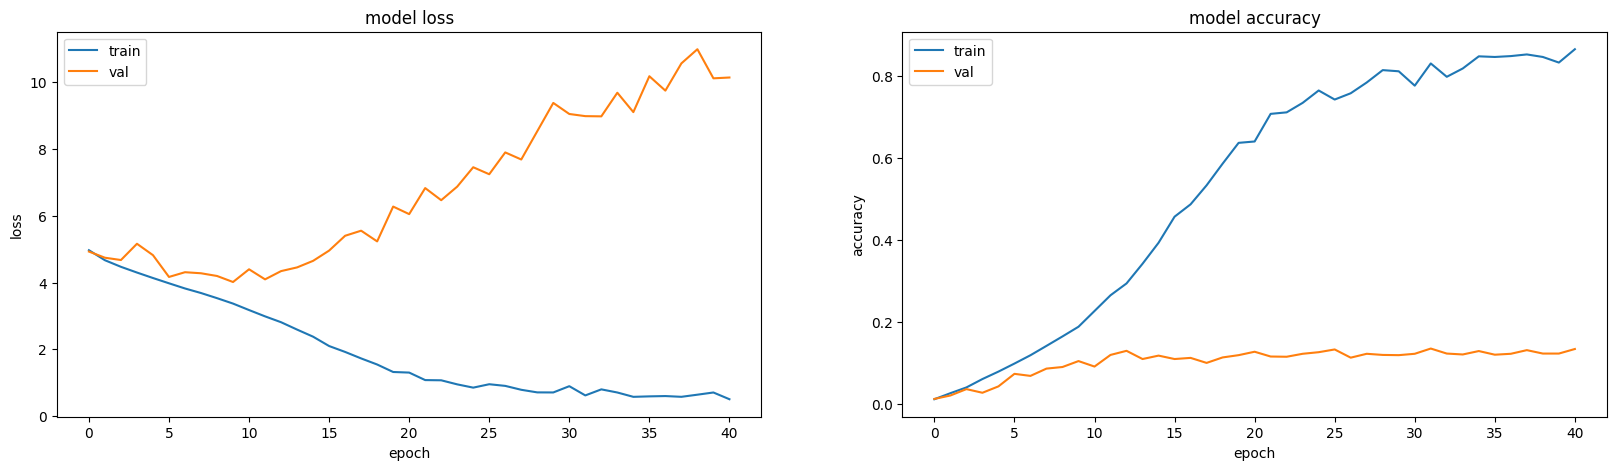

INFO:tensorflow:Assets written to: model__40/assets
264/264 [==============================] - 63s 240ms/step - loss: 0.5072 - accuracy: 0.8657 - val_loss: 10.1413 - val_accuracy: 0.1350
Epoch 42/400
264/264 [==============================] - 61s 230ms/step - loss: 0.5311 - accuracy: 0.8648 - val_loss: 11.1968 - val_accuracy: 0.1117
Epoch 43/400
264/264 [==============================] - 61s 230ms/step - loss: 0.6055 - accuracy: 0.8551 - val_loss: 10.6871 - val_accuracy: 0.1172
Epoch 44/400
264/264 [==============================] - 61s 230ms/step - loss: 0.4886 - accuracy: 0.8839 - val_loss: 11.7796 - val_accuracy: 0.1144
Epoch 45/400
264/264 [==============================] - 61s 230ms/step - loss: 0.5845 - accuracy: 0.8638 - val_loss: 11.2528 - val_accuracy: 0.1228
Epoch 46/400
264/264 [==============================] - 61s 230ms/step - loss: 0.4898 - accuracy: 0.8811 - val_loss: 11.2422 - val_accuracy: 0.1122
Epoch 47/400
264/264 [==============================] - 61s 231ms/step - 

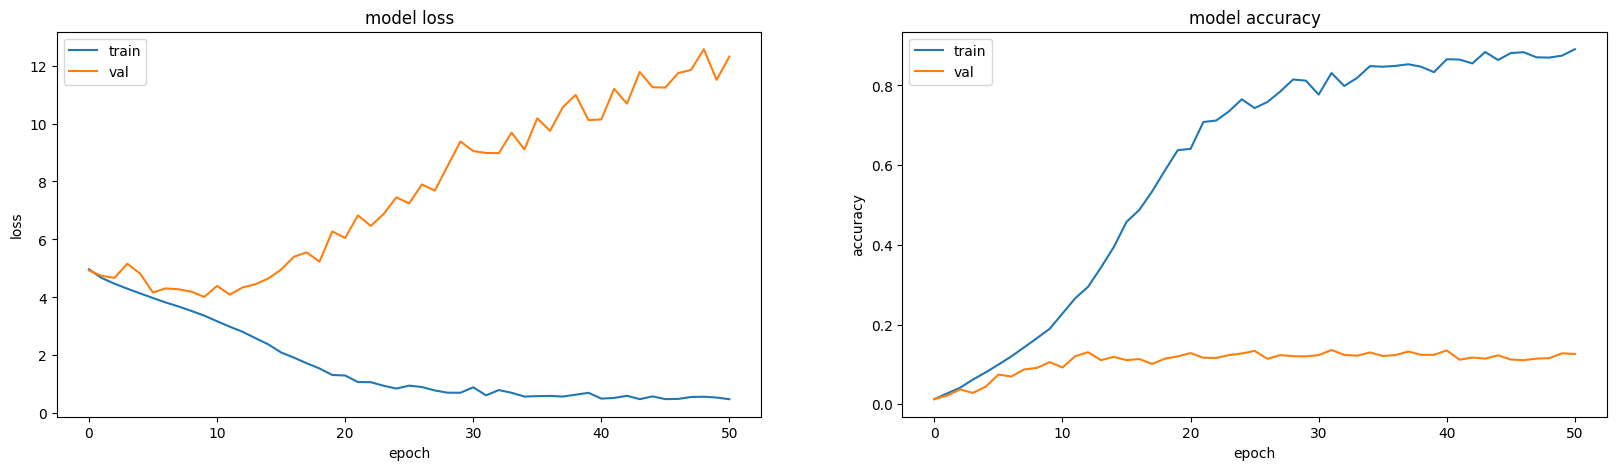

INFO:tensorflow:Assets written to: model__50/assets
264/264 [==============================] - 63s 239ms/step - loss: 0.4865 - accuracy: 0.8908 - val_loss: 12.3129 - val_accuracy: 0.1261
Epoch 52/400
264/264 [==============================] - 61s 231ms/step - loss: 0.4557 - accuracy: 0.8925 - val_loss: 11.4653 - val_accuracy: 0.1189
Epoch 53/400
264/264 [==============================] - 61s 231ms/step - loss: 0.3594 - accuracy: 0.9112 - val_loss: 11.4354 - val_accuracy: 0.1256
Epoch 54/400
264/264 [==============================] - 61s 231ms/step - loss: 0.4212 - accuracy: 0.8984 - val_loss: 12.0337 - val_accuracy: 0.1233
Epoch 55/400
264/264 [==============================] - 61s 230ms/step - loss: 0.5078 - accuracy: 0.8820 - val_loss: 14.0721 - val_accuracy: 0.1178
Epoch 56/400
264/264 [==============================] - 61s 230ms/step - loss: 0.5035 - accuracy: 0.8851 - val_loss: 11.9884 - val_accuracy: 0.1167
Epoch 57/400
264/264 [==============================] - 61s 231ms/step - 

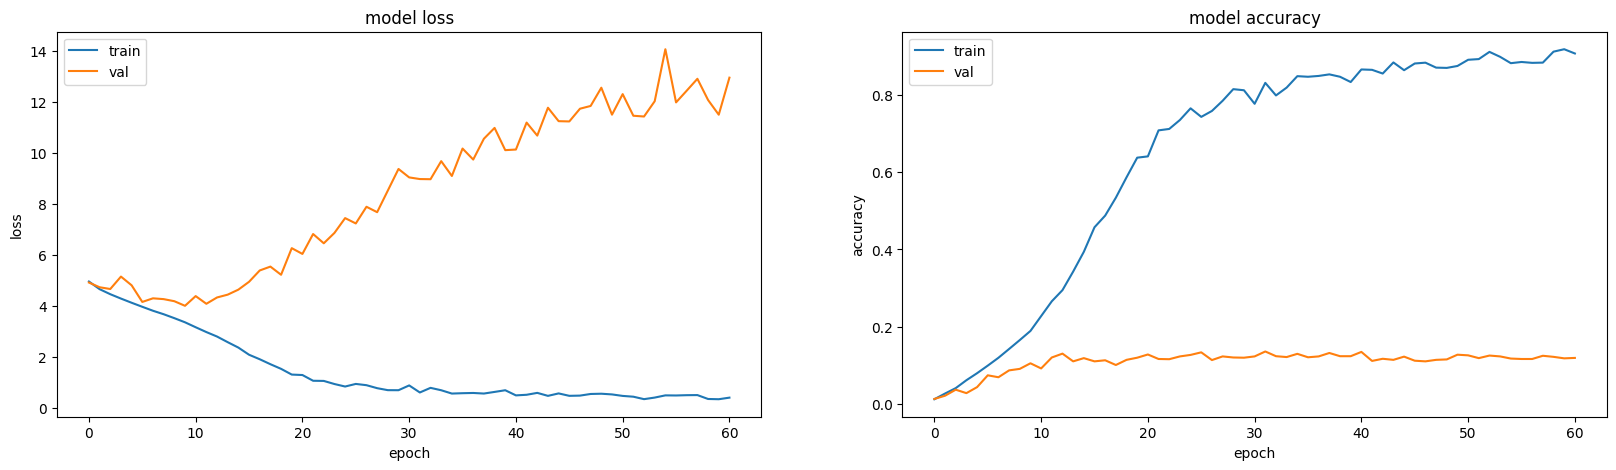

INFO:tensorflow:Assets written to: model__60/assets
264/264 [==============================] - 63s 240ms/step - loss: 0.4186 - accuracy: 0.9070 - val_loss: 12.9577 - val_accuracy: 0.1194
Epoch 62/400
264/264 [==============================] - 61s 230ms/step - loss: 0.4529 - accuracy: 0.8976 - val_loss: 12.2847 - val_accuracy: 0.1283
Epoch 63/400
264/264 [==============================] - 61s 230ms/step - loss: 0.4228 - accuracy: 0.8984 - val_loss: 13.4528 - val_accuracy: 0.1144
Epoch 64/400
264/264 [==============================] - 61s 230ms/step - loss: 0.3574 - accuracy: 0.9182 - val_loss: 12.8598 - val_accuracy: 0.1194
Epoch 65/400
264/264 [==============================] - 61s 230ms/step - loss: 0.3738 - accuracy: 0.9184 - val_loss: 14.2435 - val_accuracy: 0.1061
Epoch 66/400
264/264 [==============================] - 61s 230ms/step - loss: 0.4807 - accuracy: 0.8968 - val_loss: 11.8304 - val_accuracy: 0.1239
Epoch 67/400
264/264 [==============================] - 61s 231ms/step - 

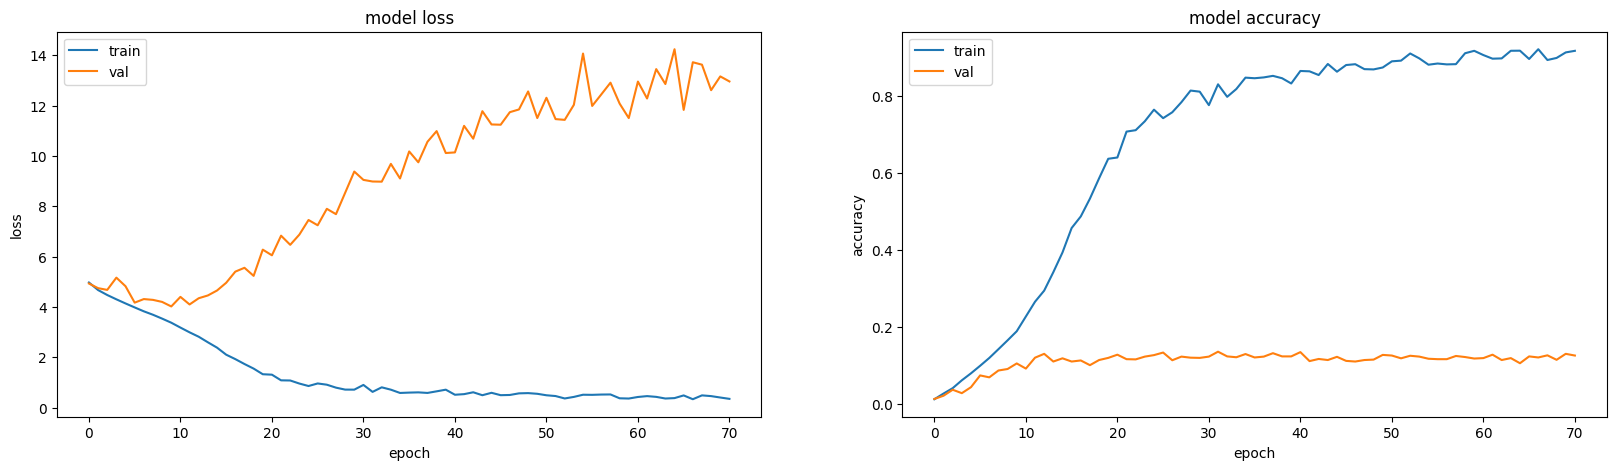

INFO:tensorflow:Assets written to: model__70/assets
264/264 [==============================] - 63s 240ms/step - loss: 0.3440 - accuracy: 0.9181 - val_loss: 12.9629 - val_accuracy: 0.1261
Epoch 72/400
264/264 [==============================] - 61s 231ms/step - loss: 0.2820 - accuracy: 0.9359 - val_loss: 13.7991 - val_accuracy: 0.1350
Epoch 73/400
264/264 [==============================] - 61s 231ms/step - loss: 0.2496 - accuracy: 0.9403 - val_loss: 12.6577 - val_accuracy: 0.1306
Epoch 74/400
264/264 [==============================] - 61s 230ms/step - loss: 0.2986 - accuracy: 0.9348 - val_loss: 13.3557 - val_accuracy: 0.1300
Epoch 75/400
264/264 [==============================] - 61s 230ms/step - loss: 0.4189 - accuracy: 0.9100 - val_loss: 14.7372 - val_accuracy: 0.1161
Epoch 76/400
264/264 [==============================] - 61s 230ms/step - loss: 0.3348 - accuracy: 0.9208 - val_loss: 14.1855 - val_accuracy: 0.1294
Epoch 77/400
264/264 [==============================] - 61s 230ms/step - 

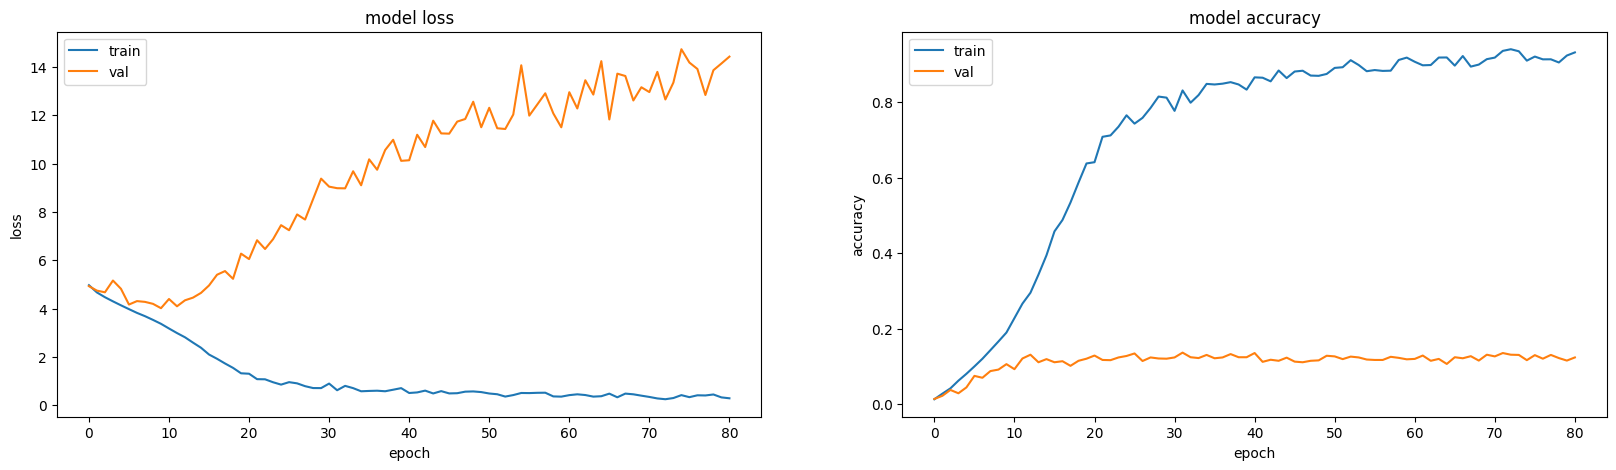

INFO:tensorflow:Assets written to: model__80/assets
264/264 [==============================] - 63s 240ms/step - loss: 0.2882 - accuracy: 0.9318 - val_loss: 14.4307 - val_accuracy: 0.1233
Epoch 82/400
264/264 [==============================] - 61s 231ms/step - loss: 0.2660 - accuracy: 0.9380 - val_loss: 13.3079 - val_accuracy: 0.1339
Epoch 83/400
264/264 [==============================] - 61s 230ms/step - loss: 0.3041 - accuracy: 0.9342 - val_loss: 14.2355 - val_accuracy: 0.1350
Epoch 84/400
264/264 [==============================] - 61s 231ms/step - loss: 0.4240 - accuracy: 0.9119 - val_loss: 15.1105 - val_accuracy: 0.1244
Epoch 85/400
264/264 [==============================] - 61s 231ms/step - loss: 0.3898 - accuracy: 0.9170 - val_loss: 14.6055 - val_accuracy: 0.1267
Epoch 86/400
264/264 [==============================] - 61s 230ms/step - loss: 0.4472 - accuracy: 0.9109 - val_loss: 15.5672 - val_accuracy: 0.1228
Epoch 87/400
264/264 [==============================] - 61s 231ms/step - 

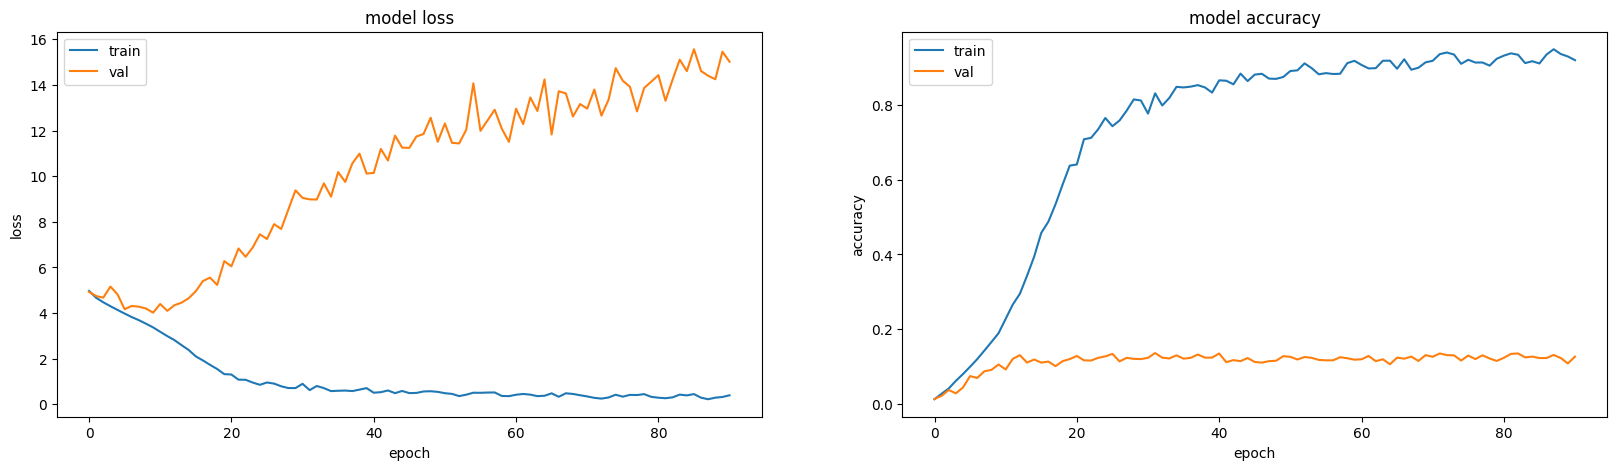

INFO:tensorflow:Assets written to: model__90/assets
264/264 [==============================] - 63s 240ms/step - loss: 0.3945 - accuracy: 0.9197 - val_loss: 15.0195 - val_accuracy: 0.1267
Epoch 92/400
264/264 [==============================] - 61s 231ms/step - loss: 0.3137 - accuracy: 0.9339 - val_loss: 14.8599 - val_accuracy: 0.1161
Epoch 93/400
264/264 [==============================] - 61s 230ms/step - loss: 0.2761 - accuracy: 0.9398 - val_loss: 15.4749 - val_accuracy: 0.1300
Epoch 94/400
264/264 [==============================] - 61s 231ms/step - loss: 0.3156 - accuracy: 0.9366 - val_loss: 15.6343 - val_accuracy: 0.1233
Epoch 95/400
264/264 [==============================] - 61s 230ms/step - loss: 0.3241 - accuracy: 0.9347 - val_loss: 15.6091 - val_accuracy: 0.1189
Epoch 96/400
264/264 [==============================] - 61s 231ms/step - loss: 0.3828 - accuracy: 0.9231 - val_loss: 14.6989 - val_accuracy: 0.1183
Epoch 97/400
264/264 [==============================] - 61s 230ms/step - 

KeyboardInterrupt: 

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 400
history = model.fit(x_train, y_train, epochs=epochs, shuffle=True, validation_data=(x_val, y_val), callbacks=[real_time_callback()])